<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



### Integrantes:

* Carignano, Hugo. 
* Diaz, Federico.
* Villafañe, Roxana Noelia. 

<a name="exploratory_data_analysis"></a>
## **Consignas para la materia Aprendisaje Supervisado**

### 1 General 
*FECHA LíMITE DE ENTREGA: 12/09*

Realizar un informe en formato notebook, en la cual se presenten los resultados del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañer@s de clase).

Se evaluará principalmente la claridad del mensaje presentado, el uso de las herramientas y los conceptos desarrollados durante las clases de la materia " Introducción al Aprendisaje Automático". Asimismo, el mismo debe incluir de manera clara los hallazgos y problemas encontrados y las posibles accionar a tomar.

Se aconseja que el informe tenga una estructura ordenada, clara y fácil de leer. Por ejemplo, podría contar con una introducción a la problemática a resolver, una descripción de los datos a emplear, el desarrollo propiamente dicho de todo el trabajo y las conclusiones que se obtuvieron.



### 2 Consignas de Aprendisaje Supervisado

Esta entrega es una continuación del trabajo anterior, donde se agregan nuevos algoritmos para evaluar en nuestro dataSet. 

Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:

##### Preparando el dataSet:

Utilizar la configuración del dataset empleada en el trabajo anterior, en lo que respecta al balanceo del dataset. 

  1- Recordar que en nuestro caso podemos realizar clasificación binaria (ccb y csb) . Por lo cual se pueden descartar aquellas columnas categóricas que no sumen al problema y definir como 'target' nuesta columna de interés.

  2- De las variables/características/features numéricas que hayan encontrado en notebooks anteriores, elegir las mas representativas.

##### Explorarción de algoritmos de clasificación: 
 1. Entrenar el modelo sin parámetros y tomarlo como baseline. Revisar documentación para identificar los parámetros correspondientes.

 2. Utilizar CV para encontrar los parámetros para encontrar el mejor modelo de cada uno de ellos. 
 
 3. Graficar la métrica elegida con respecto al cambio de los parámetros en los conjuntos 'test' y 'train'.

 4. Hacer una tabla para comparar los mejores modelos de cada algoritmo.
 
 5. Visualizar los resultados por medio de:
    * Matriz de Confusión
    * Reporte de Clasificación
    * Curvas ROC
 
Explorar los algoritmos:
 * Regresión Logistica 
 * NaiveBayes
 * SVM

Probar luego métodos de [ensemble](https://scikit-learn.org/stable/modules/ensemble.html#ensemble):
 * Random Forest
 * Boosting
 * Luego probar con los modelos mas sensillos, métodos de voting y ver si mejoran los resultados.
Pueden probar [VotingClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)


Extra si les queda tiempo:
 * Redes neuronales, con las imágenes como datos de entrada. 

 
Automatizar lo mas posible el proceso. 

Recordar de documentar los pasos que están llevando a cabo, comentar el código, plantear inconvenientes y contar lo que encontraron, poner conclusiones :).



### 3 Corriendo la Notebook

Clonar el donde están las imágenes y luego moverse entre las carpetas. 

In [1]:
!pip install --upgrade scikit-learn #debemos actualizar scikit-learn para visualizar el pipeline

     |████████████████████████████████| 22.3 MB 6.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
#corroboramos la version ultima de sklearn
import sklearn
sklearn.__version__

'0.24.2'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.metrics import plot_precision_recall_curve
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_det_curve
from sklearn.metrics import precision_recall_curve
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer



### Ingresamos los datos

In [6]:
train = pd.read_csv("https://gitlab.com/diegobcuadro/mentoria-deteccion-de-objetos-en-imagenes/-/raw/master/dataset/dataSet_train_crop_features_labels.csv", index_col=0, low_memory=False)

In [7]:
test = pd.read_csv('https://gitlab.com/diegobcuadro/mentoria-deteccion-de-objetos-en-imagenes/-/raw/master/dataset/dataSet_test_crop_features_labels.csv', index_col=0, low_memory=False )

In [8]:
#chequeamos que esten bien ingresados los datos
train.head()

filename  width  ...      2046      2047
0  Video1-frame-000001_single_box_0.jpg    640  ...  0.574400  0.002943
1  Video1-frame-000002_single_box_0.jpg    640  ...  0.584723  0.016324
2  Video1-frame-000003_single_box_0.jpg    640  ...  0.363607  0.022648
3  Video1-frame-000005_single_box_0.jpg    640  ...  0.441648  0.007727
4  Video1-frame-000006_single_box_0.jpg    640  ...  0.450313  0.105094

[5 rows x 2063 columns]

In [9]:
#chequeamos que esten bien ingresados los datos
test.head()

filename  width  ...      2046      2047
0  Video1-frame-000004_single_box_0.jpg    640  ...  0.499648  0.015035
1  Video1-frame-000021_single_box_0.jpg    640  ...  0.372580  0.057565
2  Video1-frame-000039_single_box_0.jpg    640  ...  0.631417  0.047634
3  Video1-frame-000040_single_box_0.jpg    640  ...  0.583134  0.020465
4  Video1-frame-000049_single_box_0.jpg    640  ...  0.616542  0.032798

[5 rows x 2063 columns]

In [10]:
print(train.shape)
print(test.shape)

(1913, 2063)
(495, 2063)


#### Seleccionamos las variables de trabajo

In [11]:
#seleccionamos las columnas con las que vamos a trabajar
X_train = train[['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B']]

In [12]:
y_train = train[['clase']]

In [13]:
X_test = test[['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B']]

In [14]:
y_test = test[['clase']]

In [15]:
le = preprocessing.LabelEncoder()
le.fit(y_train) #aca vamos a codificar los labels categoricos

LabelEncoder()

In [16]:
list(le.classes_) 

['ccb', 'csb']

In [17]:
y_train_enc = le.transform(y_train)  #aca vamos a transformar los labels categoricos

In [18]:
y_train_LE = pd.DataFrame(y_train_enc) #transformamos a pandas dataframe

In [19]:
#aplicamos las transformaciones en y_test tambien
le.fit(y_test)
y_test_enc = le.transform(y_test)
y_test_LE = pd.DataFrame(y_test_enc)

Como podemos ver, con este baseline, se overfittean los resultados de TRAIN, dando como diferencia un 4 % entre training y testing. 

https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv




## Algoritmo de Random Forest 


Un modelo Random Forest está formado por un conjunto (ensemble) de árboles de decisión individuales, cada uno entrenado con una muestra aleatoria extraída de los datos de entrenamiento originales mediante bootstrapping. Esto implica que cada árbol se entrena con unos datos ligeramente distintos. En cada árbol individual, las observaciones se van distribuyendo por bifurcaciones (nodos) generando la estructura del árbol hasta alcanzar un nodo terminal. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

Para entender cómo funcionan los modelos Random Forest es necesario conocer primero los conceptos de ensemble y bagging.

Métodos de ensemble

Los métodos de ensemble combinan múltiples modelos en uno nuevo con el objetivo de lograr un equilibro entre bias y varianza, consiguiendo así mejores predicciones que cualquiera de los modelos individuales originales. Dos de los tipos de ensemble más utilizados son:

**Bagging**: Se ajustan múltiples modelos, cada uno con un subconjunto distinto de los datos de entrenamiento. Para predecir, todos los modelos que forman el agregado participan aportando su predicción. Como valor final, se toma la media de todas las predicciones (variables continuas) o la clase más frecuente (variables categóricas). Los modelos Random Forest están dentro de esta categoría.

**Boosting**: Se ajustan secuencialmente múltiples modelos sencillos, llamados weak learners, de forma que cada modelo aprende de los errores del anterior. Como valor final, al igual que en bagging, se toma la media de todas las predicciones (variables continuas) o la clase más frecuente (variables cualitativas). Tres de los métodos de boosting más empleados son AdaBoost, Gradient Boosting y Stochastic Gradient Boosting.

Aunque el objetivo final es el mismo, lograr un balance óptimo entre bias y varianza, existen dos diferencias importantes:

Forma en que consiguen reducir el error total. El error total de un modelo puede descomponerse como bias+varianza+ϵ

**En bagging, se emplean modelos con muy poco bias pero mucha varianza, agregándolos se consigue reducir la varianza sin apenas inflar el bias. En boosting, se emplean modelos con muy poca varianza pero mucho bias, ajustando secuencialmente los modelos se reduce el bias. Por lo tanto, cada una de las estrategias reduce una parte del error total.**

**Forma en que se introducen variaciones en los modelos que forman el ensemble. En bagging, cada modelo es distinto del resto porque cada uno se entrena con una muestra distinta obtenida mediante bootstrapping. En boosting, los modelos se ajustan secuencialmente y la importancia (peso) de las observaciones va cambiando en cada iteración, dando lugar a diferentes ajustes.**

La clave para que los métodos de ensemble consigan mejores resultados que cualquiera de sus modelos individuales es que, los modelos que los forman, sean lo más diversos posibles (sus errores no estén correlacionados). Una analogía que refleja este concepto es la siguiente: supóngase un juego como el trivial en el que los equipos tienen que acertar preguntas sobre temáticas diversas. Un equipo formado por muchos jugadores, cada uno experto en un tema distinto, tendrá más posibilidades de ganar que un equipo formado por jugadores expertos en un único tema o por un único jugador que sepa un poco de todos los temas.

El término bagging es el diminutivo de bootstrap aggregation, y hace referencia al empleo del muestreo repetido con reposición bootstrapping con el fin de reducir la varianza de algunos modelos de aprendizaje estadístico, entre ellos los basados en árboles.



*Entrenamiento de Random Forest*


El algoritmo de Random Forest es una modificación del proceso de bagging que consigue mejorar los resultados gracias a que decorrelaciona aún más los árboles generados en el proceso.

Los beneficios del bagging se basan en el hecho de que, promediando un conjunto de modelos, se consigue reducir la varianza. Esto es cierto siempre y cuando los modelos agregados no estén correlacionados. Si la correlación es alta, la reducción de varianza que se puede lograr es pequeña.

Los métodos de random forest y bagging siguen el mismo algoritmo con la única diferencia de que, en random forest, antes de cada división, se seleccionan aleatoriamente m
predictores. La diferencia en el resultado dependerá del valor m escogido. Si m=p, los resultados de random forest y bagging son equivalentes. 

La mejor forma para encontrar el valor óptimo de m
es evaluar el out-of-bag-error o recurrir a validación cruzada.

Al igual que ocurre con bagging, random forest no sufre problemas de overfit por aumentar el número de árboles creados en el proceso. Alcanzado un determinado número, la reducción del error de test se estabiliza.


## Random Forest Baseline

Documentación en scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

##### Hiperparámetros por defecto 
* `n_estimators = 100`
* `criterion = gini`
* `max_depth =  int, default=None`
* `max_features = "auto”`, then `max_features=sqrt(n_features)`
* `min_samples_leaf = int or float, default=1`
* `min_samples_split= int or float, default=2`

### Solo Numéricas

In [20]:
%%time
pipeline = Pipeline([("scaler", StandardScaler()),
                     ("rf", RandomForestClassifier(class_weight='balanced_subsample', random_state=42))])
pipeline.fit(X_train,y_train_LE)


CPU times: user 460 ms, sys: 3.27 ms, total: 464 ms
Wall time: 477 ms


In [21]:
pipeline #veamos que contiene el pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        random_state=42))])

Como se puede observar en la siguiente Figura, solo se han escalado los datos y usado el modelo por defecto sin tunning de hiperparametros. 

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1427
           1       1.00      1.00      1.00       486

    accuracy                           1.00      1913
   macro avg       1.00      1.00      1.00      1913
weighted avg       1.00      1.00      1.00      1913



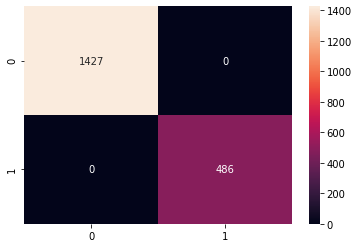

In [22]:
y_pred_train = pipeline.predict(X_train)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train_LE, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train_LE, y_pred_train))

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       382
           1       0.96      0.88      0.92       113

    accuracy                           0.96       495
   macro avg       0.96      0.93      0.95       495
weighted avg       0.96      0.96      0.96       495



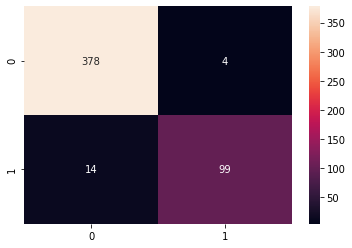

In [23]:
y_pred = pipeline.predict(X_test)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test_LE, y_pred), annot=True, fmt='g')
print(classification_report(y_test_LE, y_pred))

### Con las 10 mejores de la **ResNet**

In [24]:
train_numeric = train._get_numeric_data()
test_numeric = test._get_numeric_data()


In [25]:
train_numeric.head()

width  height  xmin  xmax  ...      2044      2045      2046      2047
0    640     360   304   359  ...  0.003393  0.009189  0.574400  0.002943
1    640     360   300   363  ...  0.119403  0.024265  0.584723  0.016324
2    640     360   301   368  ...  0.130680  0.034125  0.363607  0.022648
3    640     360   304   364  ...  0.015458  0.001125  0.441648  0.007727
4    640     360   300   366  ...  0.042033  0.015454  0.450313  0.105094

[5 rows x 2059 columns]

In [26]:
train.head()

filename  width  ...      2046      2047
0  Video1-frame-000001_single_box_0.jpg    640  ...  0.574400  0.002943
1  Video1-frame-000002_single_box_0.jpg    640  ...  0.584723  0.016324
2  Video1-frame-000003_single_box_0.jpg    640  ...  0.363607  0.022648
3  Video1-frame-000005_single_box_0.jpg    640  ...  0.441648  0.007727
4  Video1-frame-000006_single_box_0.jpg    640  ...  0.450313  0.105094

[5 rows x 2063 columns]

In [27]:
cols = ['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B']
cat_cols = ['videoname']

In [28]:
resnet_cols = train_numeric.iloc[:,11:]
resnet_cols.head()

0         1         2  ...      2045      2046      2047
0  0.003306  0.110736  0.085072  ...  0.009189  0.574400  0.002943
1  0.051257  0.181405  0.080709  ...  0.024265  0.584723  0.016324
2  0.009964  0.171841  0.359899  ...  0.034125  0.363607  0.022648
3  0.082800  0.228622  0.162064  ...  0.001125  0.441648  0.007727
4  0.086575  0.182595  0.344001  ...  0.015454  0.450313  0.105094

[5 rows x 2048 columns]

In [29]:
#resnet_cols_list = resnet_cols.columns.values.tolist() #vamos a crear una lista de las variables de la ResNet

In [30]:
#numeric_transformer = Pipeline(
                        #steps=[('scaler', StandardScaler())]
                      #)

In [31]:
#select_features = Pipeline(
    #steps = [('chi2', SelectKBest(chi2, 10))]
#)

In [32]:
#preprocessor = ColumnTransformer(
                    #transformers=[
                        #('numeric', numeric_transformer, cols),
                        #('chi2', select_features, resnet_cols_list)
                    #],
                    #remainder='passthrough'
                #)

In [33]:
#X_train = preprocessor.fit_transform(train_numeric, y_train_LE)
#X_train.shape #tenemos las 10 mejores de la resnet + las numericas

## Vamos a pasar a dataframe para ver mejor las variables

https://stackoverflow.com/questions/54298550/attributeerror-when-using-columntransformer-into-a-pipeline

https://stackoverflow.com/questions/54646709/sklearn-pipeline-get-feature-names-after-onehotencode-in-columntransformer

In [34]:
#preprocessor.named_steps['preprocessor'].transformers_[1][1]\
   #.named_steps['chi2'].get_feature_names(resnet_cols_list)

In [35]:
#encoded_chi2 = preprocessor.named_transformers_['chi2'].get_feature_names(resnet_cols_list)
#labels = np.concatenate([cols, encoded_chi2])

# Conversión a dataframe
#X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
#X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
#X_train_prep.info()

In [36]:
#encoded_cat = preprocessor.named_transformers_['chi2']\
              #.get_feature_names(resnet_cols_list)
#labels = np.concatenate([cols, resnet_cols_list])
#datos_train_prep = preprocessor.transform(X_train)
#datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
#datos_train_prep.info()

In [37]:
baseline_10_resnet = Pipeline([("chi2", SelectKBest(chi2, k=10)),
                     ("scaler", StandardScaler()),
                     ("rf", RandomForestClassifier(class_weight='balanced_subsample', random_state=42))])


In [38]:
baseline_10_resnet.fit(train_numeric, y_train_LE)


Pipeline(steps=[('chi2',
                 SelectKBest(score_func=<function chi2 at 0x7f19c54c1e60>)),
                ('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        random_state=42))])

In [39]:
baseline_10_resnet #veamos que contiene el pipeline

Pipeline(steps=[('chi2',
                 SelectKBest(score_func=<function chi2 at 0x7f19c54c1e60>)),
                ('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        random_state=42))])

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1427
           1       1.00      1.00      1.00       486

    accuracy                           1.00      1913
   macro avg       1.00      1.00      1.00      1913
weighted avg       1.00      1.00      1.00      1913



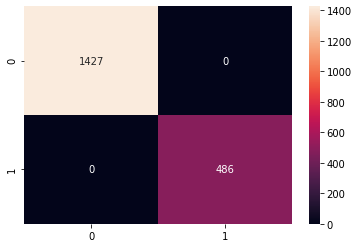

In [40]:
y_pred_train = baseline_10_resnet.predict(train_numeric)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train_LE, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train_LE, y_pred_train))

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       382
           1       0.97      0.93      0.95       113

    accuracy                           0.98       495
   macro avg       0.98      0.96      0.97       495
weighted avg       0.98      0.98      0.98       495



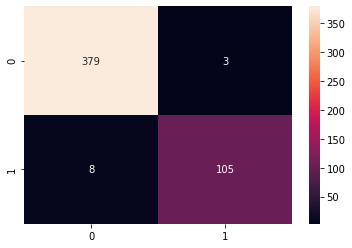

In [41]:
y_pred = baseline_10_resnet.predict(test_numeric)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test_LE, y_pred), annot=True, fmt='g')
print(classification_report(y_test_LE, y_pred))

#### Feature Importance

## Curva ROC y PR

Curva ROC para Random Forest Classifier 



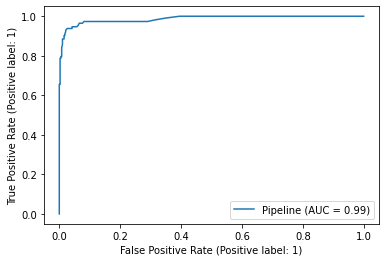

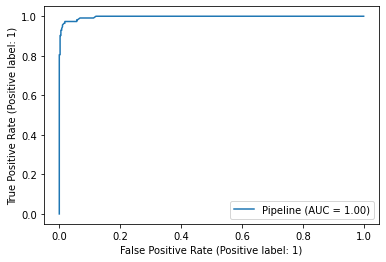

In [42]:
rf_base = plot_roc_curve(pipeline, X_test, y_test_LE) 
rf_base10 = plot_roc_curve(baseline_10_resnet, test_numeric, y_test_LE) 
print('Curva ROC para Random Forest Classifier \n')

Curva PR para RandomForest Classifier 



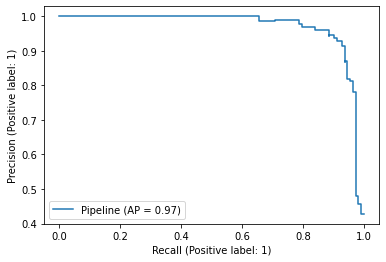

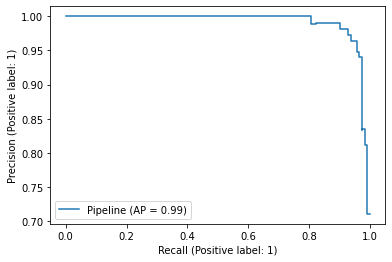

In [43]:
rf_base_pr = plot_precision_recall_curve(pipeline, X_test, y_test_LE)
rf_base_pr_10 = plot_precision_recall_curve(baseline_10_resnet, test_numeric, y_test_LE)
print('Curva PR para RandomForest Classifier \n')

## Random Forest con Tunning de Hiperparámetros

### GridSearchCV 

En esta instancia armamos un Pipeline con los pasos a emplear, solo se estandarizaron con la función StandarScaler() disponible en scikit-learn y se empleo como método de clasificación RandomForest, en el cual se seteo la semilla para reproducibilidad y mediante el argumento class_weight, vamos a tener en cuenta el desbalanceo original de las clases. Mas información en https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

Trabajar con Pipeline nos permite trabajar de manera ordenada en cuanto a los pasos/transformaciones que vamos a emplear en un dataset. Más información en la documentación: 
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html 

Mediante params_ especificamos los parametros a tunear con RandomForest, y realizamos una validación cruzada de 3 folds. 

## Con solo las numericas


In [44]:
%%time
pipeline = Pipeline([("scaler", StandardScaler()),
                     ("rf", RandomForestClassifier(class_weight='balanced_subsample', random_state=42))])


params = {"rf__max_depth": [1, 2, 3, 5],
          "rf__max_features": [2, 3, 5],
          "rf__min_samples_split": [3, 5, 10, 15],
          "rf__min_samples_leaf": [3, 5],
          # "bootstrap": [True, False],
          "rf__criterion": ["gini", "entropy"]}
kf = KFold(n_splits=3, shuffle=True, random_state=4)
# initialize
grid_pipeline = GridSearchCV(pipeline,params,n_jobs=-1, verbose=1, cv=kf, scoring='accuracy', refit=True, return_train_score=True)
# fit
grid_pipeline.fit(X_train,y_train)


Fitting 3 folds for each of 192 candidates, totalling 576 fits
CPU times: user 5.48 s, sys: 315 ms, total: 5.79 s
Wall time: 2min 50s


In [45]:
grid_pipeline #aca podemos ver el pipeline

GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced_subsample',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [1, 2, 3, 5],
                         'rf__max_features': [2, 3, 5],
                         'rf__min_samples_leaf': [3, 5],
                         'rf__min_samples_split': [3, 5, 10, 15]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [46]:
grid_pipeline.best_params_

{'rf__criterion': 'entropy',
 'rf__max_depth': 5,
 'rf__max_features': 5,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 3}

In [47]:
results = grid_pipeline.cv_results_
df_grid = pd.DataFrame(results)
df_grid.head()

df_grid[['param_rf__criterion', 'param_rf__max_depth', 'param_rf__max_features', 'param_rf__min_samples_split','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

param_rf__criterion param_rf__max_depth  ... std_test_score rank_test_score
185             entropy                   5  ...       0.015873               1
184             entropy                   5  ...       0.015873               1
95                 gini                   5  ...       0.012979               3
187             entropy                   5  ...       0.017350               4
186             entropy                   5  ...       0.017020               5
..                  ...                 ...  ...            ...             ...
106             entropy                   1  ...       0.019863             185
107             entropy                   1  ...       0.019863             185
108             entropy                   1  ...       0.019863             185
109             entropy                   1  ...       0.019863             185
110             entropy                   1  ...       0.019863             185

[192 rows x 7 columns]

### Variación de los scores en train y test 

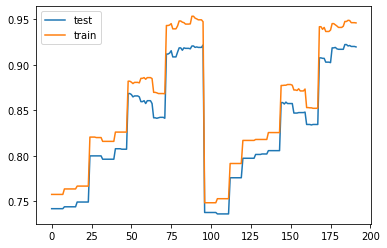

In [48]:
test_scores = grid_pipeline.cv_results_['mean_test_score']
train_scores = grid_pipeline.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()


Vamos a plotear como varian los hiperparámetros en la búsqueda en grilla:

Fuente del código:
https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv




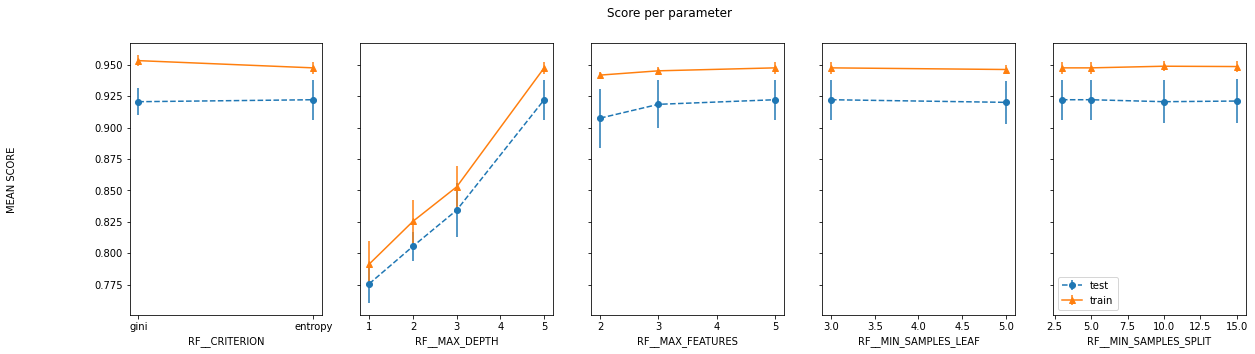

In [49]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
## Results from grid search
results = grid_pipeline.cv_results_
means_test = results['mean_test_score']
stds_test = results['std_test_score']
means_train = results['mean_train_score']
stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
masks=[]
masks_names= list(grid_pipeline.best_params_.keys())
for p_k, p_v in grid_pipeline.best_params_.items():
  masks.append(list(results['param_'+p_k].data==p_v))

params=grid_pipeline.param_grid

## Ploting results
fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
fig.suptitle('Score per parameter')
fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
pram_preformace_in_best = {}
for i, p in enumerate(masks_names):
  m = np.stack(masks[:i] + masks[i+1:])
  pram_preformace_in_best
  best_parms_mask = m.all(axis=0)
  best_index = np.where(best_parms_mask)[0]
  x = np.array(params[p])
  y_1 = np.array(means_test[best_index])
  e_1 = np.array(stds_test[best_index])
  y_2 = np.array(means_train[best_index])
  e_2 = np.array(stds_train[best_index])
  ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
  ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
  ax[i].set_xlabel(p.upper())

plt.legend()
plt.show()



**Performance en train y test**

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

         ccb       0.96      0.97      0.96      1427
         csb       0.91      0.87      0.89       486

    accuracy                           0.95      1913
   macro avg       0.93      0.92      0.93      1913
weighted avg       0.95      0.95      0.95      1913



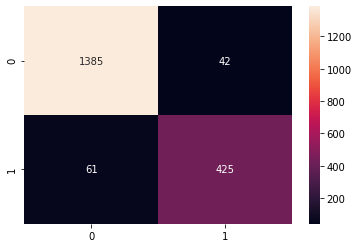

In [50]:
y_pred_train = grid_pipeline.predict(X_train)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

         ccb       0.92      0.93      0.93       382
         csb       0.76      0.74      0.75       113

    accuracy                           0.89       495
   macro avg       0.84      0.84      0.84       495
weighted avg       0.89      0.89      0.89       495



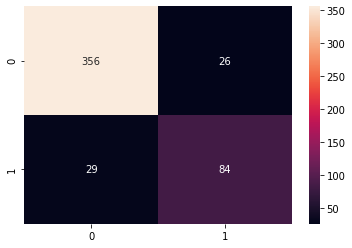

In [51]:
y_pred = grid_pipeline.predict(X_test)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
print(classification_report(y_test, y_pred))

Como podemos ver la diferencia entre TRAIN (95%) y TEST (89%) existe un 6%. Veamos si solo empleando las mejores variables de la ResNet podemos achicar esa distancia. 

**Feature Importance**

RandomForest nos permite visualizar las variables más importantes que se utilizaron para la clasificación.

In [52]:
grid_pipeline.best_estimator_.named_steps["rf"].feature_importances_

array([0.03900886, 0.06046275, 0.049372  , 0.04986898, 0.06508957,
       0.04764271, 0.03444019, 0.07836819, 0.21580103, 0.11429146,
       0.24565426])

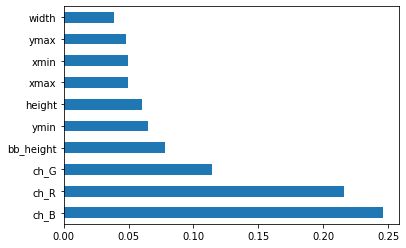

In [53]:
(pd.Series(grid_pipeline.best_estimator_.named_steps["rf"].feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))

## Con las mejores variables haciendo selección de variables (se incluyen las de la ResNet10)

Acá vamos a incluir todas las variables pero haciendo una seleccion dentro del Pipeline del modelo, para automatizar esa seleccion mediante chi cuadrado. 




In [54]:
train_numeric = train._get_numeric_data()
train_numeric

width  height  xmin  xmax  ...      2044      2045      2046      2047
0       640     360   304   359  ...  0.003393  0.009189  0.574400  0.002943
1       640     360   300   363  ...  0.119403  0.024265  0.584723  0.016324
2       640     360   301   368  ...  0.130680  0.034125  0.363607  0.022648
3       640     360   304   364  ...  0.015458  0.001125  0.441648  0.007727
4       640     360   300   366  ...  0.042033  0.015454  0.450313  0.105094
...     ...     ...   ...   ...  ...       ...       ...       ...       ...
1908   1280     720  1168  1280  ...  0.278505  0.189561  0.501087  0.132643
1909   1280     720  1047  1231  ...  0.205289  0.409898  0.912477  0.043854
1910   1280     720   974  1151  ...  0.162134  0.758789  0.849687  0.150298
1911   1280     720   902  1074  ...  0.440513  0.482803  0.638911  0.262574
1912   1280     720   771   939  ...  0.207461  0.376891  0.677032  0.001313

[1913 rows x 2059 columns]

In [55]:
test_numeric = test._get_numeric_data()
test_numeric

width  height  xmin  xmax  ...      2044      2045      2046      2047
0      640     360   301   364  ...  0.034357  0.005899  0.499648  0.015035
1      640     360   302   372  ...  0.026713  0.041257  0.372580  0.057565
2      640     360   302   370  ...  0.067228  0.011203  0.631417  0.047634
3      640     360   304   366  ...  0.011560  0.000363  0.583134  0.020465
4      640     360   301   370  ...  0.011605  0.015202  0.616542  0.032798
..     ...     ...   ...   ...  ...       ...       ...       ...       ...
490   1280     720   781   856  ...  0.106780  0.134364  0.511100  0.039986
491   1280     720   634   825  ...  0.150524  0.533963  0.263250  0.056921
492   1280     720   635   838  ...  0.162843  0.578889  0.408409  0.063361
493   1280     720   635   830  ...  0.174382  0.584406  0.256982  0.021594
494   1280     720   408   643  ...  0.222247  0.524002  1.120981  0.179200

[495 rows x 2059 columns]

In [56]:

%%time 
#nos dira la cantidad de tiempo empleado
pipeline = Pipeline([("chi2", SelectKBest(chi2, k=10)),
                     ("scaler", StandardScaler()),
                     ("rf", RandomForestClassifier(class_weight='balanced_subsample', random_state=42))])

#hiperparametros a optimizar
params = {"rf__max_depth": [1, 2, 3, 5],
          "rf__max_features": [2, 3, 5],
          "rf__min_samples_split": [3, 5, 10, 15],
          "rf__min_samples_leaf": [3, 5],
          # "bootstrap": [True, False],
          "rf__criterion": ["gini", "entropy"]}
kf = KFold(n_splits=3, shuffle=True, random_state=4)
# initialize
grid_pipeline_10 = GridSearchCV(pipeline,params,n_jobs=-1, verbose=1, cv=kf, scoring='accuracy', refit=True, return_train_score=True)
# fit
grid_pipeline_10.fit(train_numeric,y_train_LE)


Fitting 3 folds for each of 192 candidates, totalling 576 fits
CPU times: user 6.34 s, sys: 515 ms, total: 6.86 s
Wall time: 3min 33s


In [57]:
grid_pipeline_10.best_params_

{'rf__criterion': 'entropy',
 'rf__max_depth': 5,
 'rf__max_features': 3,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 3}

In [58]:
results = grid_pipeline_10.cv_results_
df_grid = pd.DataFrame(results)
df_grid.head()

df_grid[['param_rf__criterion', 'param_rf__max_depth', 'param_rf__max_features', 'param_rf__min_samples_split','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

param_rf__criterion param_rf__max_depth  ... std_test_score rank_test_score
176             entropy                   5  ...       0.005569               1
177             entropy                   5  ...       0.005569               1
178             entropy                   5  ...       0.005569               1
72                 gini                   5  ...       0.005572               4
73                 gini                   5  ...       0.005572               4
..                  ...                 ...  ...            ...             ...
99              entropy                   1  ...       0.023665             185
100             entropy                   1  ...       0.023665             185
101             entropy                   1  ...       0.023665             185
103             entropy                   1  ...       0.023665             185
98              entropy                   1  ...       0.023665             185

[192 rows x 7 columns]

#### Variación de scores a lo largo de la validación cruzada 

Fuente del código: https://stackoverflow.com/questions/62363657/how-can-i-plot-validation-curves-using-the-results-from-gridsearchcv

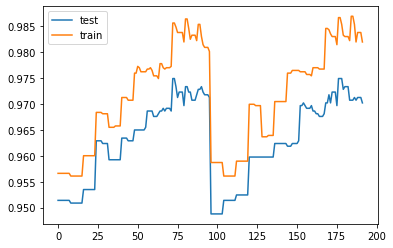

In [59]:
test_scores = grid_pipeline_10.cv_results_['mean_test_score']
train_scores = grid_pipeline_10.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()


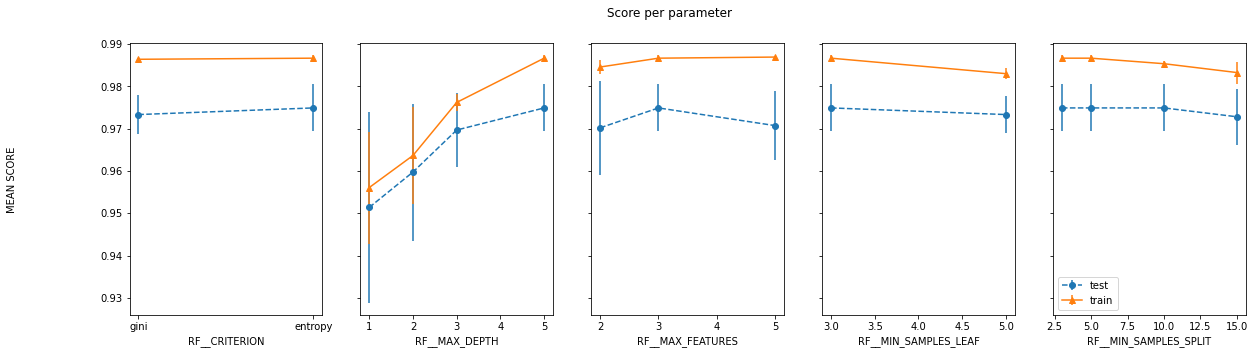

In [60]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
## Results from grid search
results = grid_pipeline_10.cv_results_
means_test = results['mean_test_score']
stds_test = results['std_test_score']
means_train = results['mean_train_score']
stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
masks=[]
masks_names= list(grid_pipeline_10.best_params_.keys())
for p_k, p_v in grid_pipeline_10.best_params_.items():
  masks.append(list(results['param_'+p_k].data==p_v))

params=grid_pipeline_10.param_grid

## Ploting results
fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
fig.suptitle('Score per parameter')
fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
pram_preformace_in_best = {}
for i, p in enumerate(masks_names):
  m = np.stack(masks[:i] + masks[i+1:])
  pram_preformace_in_best
  best_parms_mask = m.all(axis=0)
  best_index = np.where(best_parms_mask)[0]
  x = np.array(params[p])
  y_1 = np.array(means_test[best_index])
  e_1 = np.array(stds_test[best_index])
  y_2 = np.array(means_train[best_index])
  e_2 = np.array(stds_train[best_index])
  ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
  ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
  ax[i].set_xlabel(p.upper())

plt.legend()
plt.show()


**Performance en TRAIN y TEST**

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1427
           1       0.97      0.95      0.96       486

    accuracy                           0.98      1913
   macro avg       0.98      0.97      0.98      1913
weighted avg       0.98      0.98      0.98      1913



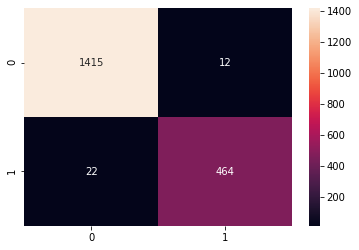

In [61]:
y_pred_train = grid_pipeline_10.predict(train_numeric)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train_LE, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train_LE, y_pred_train))

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       382
           1       0.96      0.95      0.96       113

    accuracy                           0.98       495
   macro avg       0.97      0.97      0.97       495
weighted avg       0.98      0.98      0.98       495



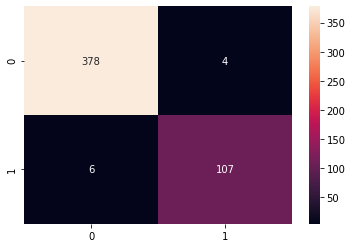

In [62]:
y_pred = grid_pipeline_10.predict(test_numeric)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test_LE, y_pred), annot=True, fmt='g')
print(classification_report(y_test_LE, y_pred))

In [63]:
grid_pipeline_10.best_estimator_.named_steps["rf"].feature_importances_

array([0.01966356, 0.01033939, 0.02279415, 0.01895105, 0.02235204,
       0.02797264, 0.03335194, 0.03860547, 0.41858775, 0.38738202])

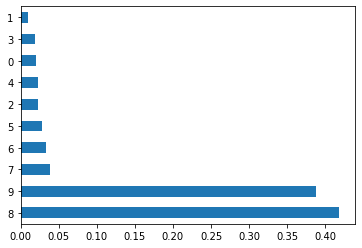

In [64]:
(pd.Series(grid_pipeline_10.best_estimator_.named_steps["rf"].feature_importances_)
   .nlargest(10)
   .plot(kind='barh')) 

In [65]:
### aca van curvas ROC y PR

Curva ROC para RF Classifier 



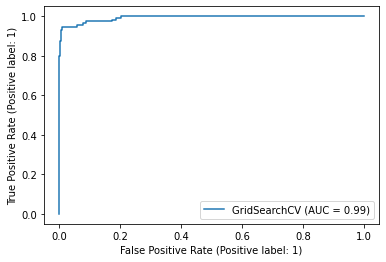

In [67]:
rf_tunned = plot_roc_curve(grid_pipeline_10, test_numeric, y_test_LE) 
print('Curva ROC para RF Classifier \n')

Curva PR para RF Classifier 



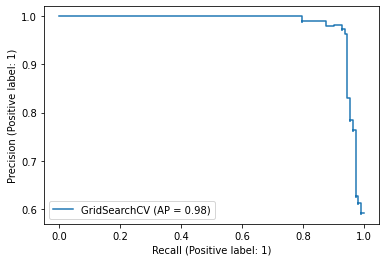

In [69]:
rf_ = plot_precision_recall_curve(grid_pipeline_10, test_numeric, y_test_LE)
print('Curva PR para RF Classifier \n')

### Conclusiones Random Forest

Mediante un modelo baseline y una optimización de scikit-learn en Grilla se lograron valores de performance en train y test similares, lo que nos permitió minimizar la diferencia entre bias y varianza. 

Esto nos permite afirmar que el modelo de Random Forest es uno de los mejores que se entrenaron en esta instancia. 

La exactitud aumentó agregando las 10 mejores variables del dataset, esa selección se realizó con chi-cuadrado, lo que nos permitió reducir la información redundante en el dataset. 

Luego se realizaron gráficos para observar que hiperparámetros eran los óptimos como así también las curvas AUC y Precision Recall. 
También se imprimió el reporte de clasificación disponible en el paquete scikit-learn. 